In [4]:
import time
import tqdm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 
import torch.utils.data as utils
import torch.nn.init as init
from torch.autograd import Variable

In [5]:
mode = 'ROC'

In [6]:
f_rnd = pd.read_hdf("/data/t3home000/spark/LHCOlympics/data/MassRatio_RandD.h5")

In [7]:
#f_PureBkg = pd.read_hdf("/data/t3home000/spark/LHCOlympics/data/MassRatio_pureBkg.h5")

In [8]:
f_rnd.columns

Index(['Mjj', 'Mj1', 'j1 tau21', 'j1 tau32', 'j1 tau43',
       'j1 sqrt(tau^2_1)/tau^1_1', 'j1 n_trk', 'j1 pT1', 'j1 M_trim',
       'j1 M_prun', 'j1 M_mmdt', 'j1 M_sdb1', 'j1 M_sdb2', 'j1 M_sdm1', 'Mj2',
       'j2 tau21', 'j2 tau32', 'j2 tau43', 'j2 sqrt(tau^2_1)/tau^1_1',
       'j2 n_trk', 'j2 pT1', 'j2 M_trim', 'j2 M_prun', 'j2 M_mmdt',
       'j2 M_sdb1', 'j2 M_sdb2', 'j2 M_sdm1', 'isSignal'],
      dtype='object')

In [9]:
if mode == 'ROC':
    dt_PureBkg = f_rnd.values
else:
    dt_PureBkg = dt_PureBkg = f_PureBkg.values

In [10]:
dt_PureBkg[:,1] = (dt_PureBkg[:,1]-np.mean(dt_PureBkg[:,1]))/np.std(dt_PureBkg[:,1])
dt_PureBkg[:,2] = (dt_PureBkg[:,2]-np.mean(dt_PureBkg[:,2]))/np.std(dt_PureBkg[:,2])
dt_PureBkg[:,3] = (dt_PureBkg[:,3]-np.mean(dt_PureBkg[:,3]))/np.std(dt_PureBkg[:,3])
dt_PureBkg[:,4] = (dt_PureBkg[:,4]-np.mean(dt_PureBkg[:,4]))/np.std(dt_PureBkg[:,4])
dt_PureBkg[:,5] = (dt_PureBkg[:,5]-np.mean(dt_PureBkg[:,5]))/np.std(dt_PureBkg[:,5])
dt_PureBkg[:,6] = (dt_PureBkg[:,6]-np.mean(dt_PureBkg[:,6]))/np.std(dt_PureBkg[:,6])


dt_PureBkg[:,8] = (dt_PureBkg[:,8]-np.mean(dt_PureBkg[:,8]))/np.std(dt_PureBkg[:,8])
dt_PureBkg[:,9] = (dt_PureBkg[:,9]-np.mean(dt_PureBkg[:,9]))/np.std(dt_PureBkg[:,9])
dt_PureBkg[:,10] = (dt_PureBkg[:,10]-np.mean(dt_PureBkg[:,10]))/np.std(dt_PureBkg[:,10])
dt_PureBkg[:,11] = (dt_PureBkg[:,11]-np.mean(dt_PureBkg[:,11]))/np.std(dt_PureBkg[:,11])
dt_PureBkg[:,12] = (dt_PureBkg[:,12]-np.mean(dt_PureBkg[:,12]))/np.std(dt_PureBkg[:,12])

dt_PureBkg[:,14] = (dt_PureBkg[:,14]-np.mean(dt_PureBkg[:,14]))/np.std(dt_PureBkg[:,14])
dt_PureBkg[:,15] = (dt_PureBkg[:,15]-np.mean(dt_PureBkg[:,15]))/np.std(dt_PureBkg[:,15])
dt_PureBkg[:,16] = (dt_PureBkg[:,16]-np.mean(dt_PureBkg[:,16]))/np.std(dt_PureBkg[:,16])
dt_PureBkg[:,17] = (dt_PureBkg[:,17]-np.mean(dt_PureBkg[:,17]))/np.std(dt_PureBkg[:,17])
dt_PureBkg[:,18] = (dt_PureBkg[:,18]-np.mean(dt_PureBkg[:,18]))/np.std(dt_PureBkg[:,18])
dt_PureBkg[:,19] = (dt_PureBkg[:,19]-np.mean(dt_PureBkg[:,19]))/np.std(dt_PureBkg[:,19])


dt_PureBkg[:,21] = (dt_PureBkg[:,21]-np.mean(dt_PureBkg[:,21]))/np.std(dt_PureBkg[:,21])
dt_PureBkg[:,22] = (dt_PureBkg[:,22]-np.mean(dt_PureBkg[:,22]))/np.std(dt_PureBkg[:,22])
dt_PureBkg[:,23] = (dt_PureBkg[:,23]-np.mean(dt_PureBkg[:,23]))/np.std(dt_PureBkg[:,23])
dt_PureBkg[:,24] = (dt_PureBkg[:,24]-np.mean(dt_PureBkg[:,24]))/np.std(dt_PureBkg[:,24])
dt_PureBkg[:,25] = (dt_PureBkg[:,25]-np.mean(dt_PureBkg[:,25]))/np.std(dt_PureBkg[:,25])

In [11]:
idx = dt_PureBkg[:,27]
bkg_idx = np.where(idx==0)[0]
signal_idx = np.where(idx==1)[0]

In [12]:
print(bkg_idx)

[      0       1       2 ... 1099997 1099998 1099999]


In [13]:
total_PureBkg = torch.tensor(dt_PureBkg[bkg_idx])
total_PureBkg_train_x_1 = total_PureBkg.t()[1:7].t()
#total_PureBkg_train_x_2 = total_PureBkg.t()[8:13].t()
total_PureBkg_train_x_3 = total_PureBkg.t()[14:20].t()
#total_PureBkg_train_x_4 = total_PureBkg.t()[21:26].t()

#total_PureBkg_selection = torch.cat((total_PureBkg_train_x_1,total_PureBkg_train_x_2,total_PureBkg_train_x_3,total_PureBkg_train_x_4),dim=1)
total_PureBkg_selection = torch.cat((total_PureBkg_train_x_1,total_PureBkg_train_x_3),dim=1)

In [18]:
total_PureBkg_selection.shape

torch.Size([1000000, 12])

In [14]:
bs = 1000
bkgAE_train_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs, shuffle=True) 
bkgAE_test_iterator = utils.DataLoader(total_PureBkg_selection, batch_size=bs)

In [15]:
class PlanarFlow(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.D = D

    def forward(self, z, lamda):
        '''
        z - latents from prev layer
        lambda - Flow parameters (b, w, u)
        b - scalar
        w - vector
        u - vector
        '''
        b = lamda[:, :1]
        w, u = lamda[:, 1:].chunk(2, dim=1)

        # Forward
        # f(z) = z + u tanh(w^T z + b)
        transf = F.tanh(
            z.unsqueeze(1).bmm(w.unsqueeze(2))[:, 0] + b
        )
        f_z = z + u * transf

        # Inverse
        # psi_z = tanh' (w^T z + b) w
        psi_z = (1 - transf ** 2) * w
        log_abs_det_jacobian = torch.log(
            (1 + psi_z.unsqueeze(1).bmm(u.unsqueeze(2))).abs()
        )

        return f_z, log_abs_det_jacobian


In [16]:
class NormalizingFlow(nn.Module):
    def __init__(self, K, D):
        super().__init__()
        self.flows = nn.ModuleList([PlanarFlow(D) for i in range(K)])

    def forward(self, z_k, flow_params):
        # ladj -> log abs det jacobian
        sum_ladj = 0
        for i, flow in enumerate(self.flows):
            z_k, ladj_k = flow(z_k, flow_params[i])
            sum_ladj += ladj_k

        return z_k, sum_ladj

In [17]:
class VAE_NF(nn.Module):
    def __init__(self, K, D):
        super().__init__()
        self.dim = D
        self.K = K
        self.encoder = nn.Sequential(
            nn.Linear(12, 60),
            nn.ReLU(True),
            nn.Linear(60, D * 2 + K * (D * 2 + 1))
        )

        self.decoder = nn.Sequential(
            nn.Linear(D, 60),
            nn.ReLU(True),
            nn.Linear(60, 12),
            nn.Sigmoid()
        )

        self.flows = NormalizingFlow(K, D)

    def forward(self, x):
        # Run Encoder and get NF params
        enc = self.encoder(x)
        mu = enc[:, :self.dim]
        log_var = enc[:, self.dim: self.dim * 2]
        flow_params = enc[:, 2 * self.dim:].chunk(self.K, dim=1)

        # Re-parametrize
        sigma = (log_var * .5).exp()
        z = mu + sigma * torch.randn_like(sigma)
        kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

        # Construct more expressive posterior with NF
        z_k, sum_ladj = self.flows(z, flow_params)
        kl_div = kl_div / x.size(0) - sum_ladj.mean()  # mean over batch

        # Run Decoder
        x_prime = self.decoder(z_k)
        return x_prime, kl_div

In [18]:
N_EPOCHS = 50
PRINT_INTERVAL = 2000
NUM_WORKERS = 4
LR = 1e-4

N_FLOWS = 2
Z_DIM = 3

n_steps = 0

In [19]:
model = VAE_NF(N_FLOWS, Z_DIM).cuda()

In [20]:
def train():
    global n_steps
    train_loss = []
    model.train()

    for batch_idx, x in enumerate(bkgAE_train_iterator):
        start_time = time.time()
        
        x = x.float().cuda()

        x_tilde, kl_div = model(x)
        loss_recons = F.binary_cross_entropy(x_tilde, x, size_average=False) / x.size(0)
        loss = loss_recons + kl_div

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append([loss_recons.item(), kl_div.item()])

        if (batch_idx + 1) % PRINT_INTERVAL == 0:
            print('\tIter [{}/{} ({:.0f}%)]\tLoss: {} Time: {:5.3f} ms/batch'.format(
                batch_idx * len(x), 50000,
                PRINT_INTERVAL * batch_idx / 50000,
                np.asarray(train_loss)[-PRINT_INTERVAL:].mean(0),
                1000 * (time.time() - start_time)
            ))

        n_steps += 1

In [21]:
def evaluate(split='valid'):
    global n_steps
    start_time = time.time()
    val_loss = []
    model.eval()

    with torch.no_grad():
        for batch_idx, x in enumerate(bkgAE_test_iterator):
            
            x = x.float().cuda()

            x_tilde, kl_div = model(x)
            loss_recons = F.binary_cross_entropy(x_tilde, x, size_average=False) / x.size(0)
            loss = loss_recons + kl_div

            val_loss.append(loss.item())
            #writer.add_scalar('loss/{}/ELBO'.format(split), loss.item(), n_steps)
            #writer.add_scalar('loss/{}/reconstruction'.format(split), loss_recons.item(), n_steps)
            #writer.add_scalar('loss/{}/KL'.format(split), kl_div.item(), n_steps)

    print('\nEvaluation Completed ({})!\tLoss: {:5.4f} Time: {:5.3f} s'.format(
        split,
        np.asarray(val_loss).mean(0),
        time.time() - start_time
    ))
    return np.asarray(val_loss).mean(0)

In [22]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [23]:
BEST_LOSS = 99999
LAST_SAVED = -1
PATIENCE_COUNT = 0
PATIENCE_LIMIT = 5
for epoch in range(1, N_EPOCHS):
    print("Epoch {}:".format(epoch))
    train()
    cur_loss = evaluate()

    if cur_loss <= BEST_LOSS:
        PATIENCE_COUNT = 0
        BEST_LOSS = cur_loss
        LAST_SAVED = epoch
        print("Saving model!")
        if mode == 'ROC':
            torch.save(model.state_dict(),"/data/t3home000/spark/QUASAR/weights/bkg_vae_NF_previous_RND.h5")
        else:
            torch.save(model.state_dict(), "/data/t3home000/spark/QUASAR/weights/bkg_vae_NF_previous_PureBkg.h5")
    else:
        PATIENCE_COUNT += 1
        print("Not saving model! Last saved: {}".format(LAST_SAVED))
        if PATIENCE_COUNT > 5:
            print("Patience Limit Reached")
            break 

Epoch 1:


/home/spark/miniconda3/envs/myenv/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/spark/miniconda3/envs/myenv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Evaluation Completed (valid)!	Loss: -58.0806 Time: 2.559 s
Saving model!
Epoch 2:

Evaluation Completed (valid)!	Loss: -110.1818 Time: 2.941 s
Saving model!
Epoch 3:

Evaluation Completed (valid)!	Loss: -119.5503 Time: 2.952 s
Saving model!
Epoch 4:

Evaluation Completed (valid)!	Loss: -118.6668 Time: 3.056 s
Not saving model! Last saved: 3
Epoch 5:

Evaluation Completed (valid)!	Loss: -115.9187 Time: 2.910 s
Not saving model! Last saved: 3
Epoch 6:

Evaluation Completed (valid)!	Loss: -117.8735 Time: 2.943 s
Not saving model! Last saved: 3
Epoch 7:

Evaluation Completed (valid)!	Loss: -121.7348 Time: 3.042 s
Saving model!
Epoch 8:

Evaluation Completed (valid)!	Loss: -122.6165 Time: 2.956 s
Saving model!
Epoch 9:

Evaluation Completed (valid)!	Loss: -122.9455 Time: 2.997 s
Saving model!
Epoch 10:

Evaluation Completed (valid)!	Loss: -123.2696 Time: 3.015 s
Saving model!
Epoch 11:

Evaluation Completed (valid)!	Loss: -124.6803 Time: 3.027 s
Saving model!
Epoch 12:

Evaluation Complete

In [30]:
def get_loss(dt_in):
    
    dt[:,0] = (dt[:,0]-np.mean(dt[:,0]))/np.std(dt[:,0])
    dt[:,1] = (dt[:,1]-np.mean(dt[:,1]))/np.std(dt[:,1])
    dt[:,2] = (dt[:,2]-np.mean(dt[:,2]))/np.std(dt[:,2])
    dt[:,3] = (dt[:,3]-np.mean(dt[:,3]))/np.std(dt[:,3])
    dt[:,4] = (dt[:,4]-np.mean(dt[:,4]))/np.std(dt[:,4])
    dt[:,5] = (dt[:,5]-np.mean(dt[:,5]))/np.std(dt[:,5])

    dt[:,7] = (dt[:,7]-np.mean(dt[:,7]))/np.std(dt[:,7])
    dt[:,8] = (dt[:,8]-np.mean(dt[:,8]))/np.std(dt[:,8])
    dt[:,9] = (dt[:,9]-np.mean(dt[:,9]))/np.std(dt[:,9])
    dt[:,10] = (dt[:,10]-np.mean(dt[:,10]))/np.std(dt[:,10])
    dt[:,11] = (dt[:,11]-np.mean(dt[:,11]))/np.std(dt[:,11])
    dt[:,12] = (dt[:,12]-np.mean(dt[:,12]))/np.std(dt[:,12])

  
    
    total_in = torch.tensor(dt_in)
    total_in_train_x_1 = total_in.t()[0:6].t()
    #total_in_train_x_2 = total_in.t()[8:13].t()
    total_in_train_x_3 = total_in.t()[7:13].t()
    #total_in_train_x_4 = total_in.t()[21:26].t()
    #total_in_selection = torch.cat((total_in_train_x_1,total_in_train_x_2,total_in_train_x_3,total_in_train_x_4),dim=1)
    total_in_selection = torch.cat((total_in_train_x_1,total_in_train_x_3),dim=1)
    
    with torch.no_grad():
        loss_total_in = torch.mean((model(total_in_selection.float().cuda())[0]- total_in_selection.float().cuda())**2,dim=1).data.cpu().numpy()
    
    return loss_total_in

In [31]:
f = pd.read_hdf("/data/t3home000/spark//LHCOlympics_previous/LHC-Olympics/Code/Nsubjettiness_mjj.h5")
dt = f.values

In [32]:
idx = dt[:,15]
bkg_idx = np.where(idx==0)[0]
signal_idx = np.where(idx==1)[0]

In [33]:
print(bkg_idx)



[      0       1       2 ... 1099997 1099998 1099999]


In [41]:
loss_bkg = get_loss(dt[bkg_idx])
loss_sig = get_loss(dt[signal_idx])

In [42]:
loss_bkg.shape

(1000000,)

In [43]:
print(loss_bkg)

[0.6820395  2.463571   0.4850646  ... 0.47974014 0.6829187  1.2222438 ]


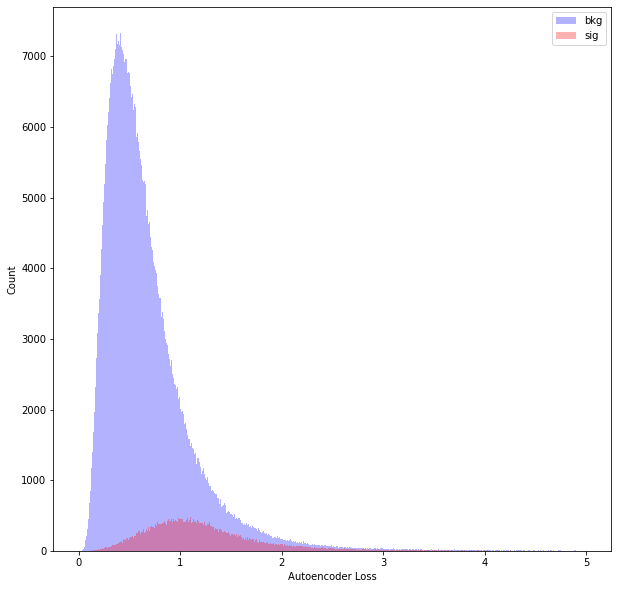

In [44]:
plt.rcParams["figure.figsize"] = (10,10)
bins = np.linspace(0,5,1000)
plt.hist(loss_bkg,bins=bins,alpha=0.3,color='b',label='bkg')
plt.hist(loss_sig,bins=bins,alpha=0.3,color='r',label='sig')
plt.xlabel(r'Autoencoder Loss')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()